In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import math
import seaborn as sns

In [2]:
data = pd.read_excel('Linear Regression.xlsx',sheet_name=0)

In [3]:
data.head

<bound method NDFrame.head of         price  sqft_living  bedrooms  bathrooms  floors
0      221900         1180         3       1.00     1.0
1      538000         2570         3       2.25     2.0
2      180000          770         2       1.00     1.0
3      604000         1960         4       3.00     1.0
4      510000         1680         3       2.00     1.0
...       ...          ...       ...        ...     ...
21608  360000         1530         3       2.50     3.0
21609  400000         2310         4       2.50     2.0
21610  402101         1020         2       0.75     2.0
21611  400000         1600         3       2.50     2.0
21612  325000         1020         2       0.75     2.0

[21613 rows x 5 columns]>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E93756348>,
      dtype=object)

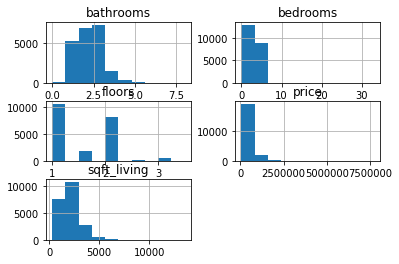

In [14]:
data.hist()

In [15]:
data.corr()

price  sqft_living  bedrooms  bathrooms    floors
price        1.000000     0.702035  0.308350   0.525138  0.256794
sqft_living  0.702035     1.000000  0.576671   0.754665  0.353949
bedrooms     0.308350     0.576671  1.000000   0.515884  0.175429
bathrooms    0.525138     0.754665  0.515884   1.000000  0.500653
floors       0.256794     0.353949  0.175429   0.500653  1.000000

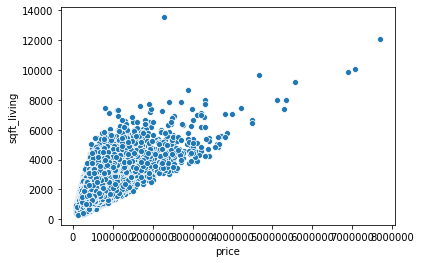

In [18]:
#Dependent variable = Price
#Independent VArisble = Sqft_living
df_x= data[['price']]
df_y = data[['sqft_living']]
sns.scatterplot(df_x['price'],df_y['sqft_living'])

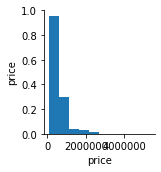

In [23]:
df = pd.DataFrame(df_x['price'],df_y['sqft_living']) 
sns.pairplot(df)

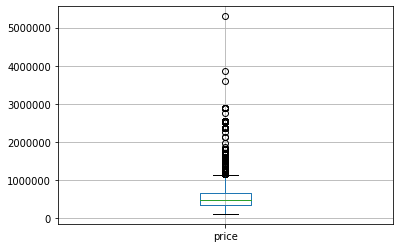

In [24]:
df.boxplot()

In [26]:
x=df.iloc[:,:1]
x

price
sqft_living         
1180          826000
2570          267345
770           429900
1960          800000
1680          510000
...              ...
1530         1250000
2310          380000
1020          840000
1600          650000
1020          840000

[21613 rows x 1 columns]

In [27]:
y=df.iloc[:,1:]
y

Empty DataFrame
Columns: []
Index: [1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, 1890, 3560, 1160, 1430, 1370, 1810, 2950, 1890, 1600, 1200, 1250, 1620, 3050, 2270, 1070, 2450, 1710, 2450, 1400, 1520, 2570, 2320, 1190, 2330, 1090, 2060, 2300, 1660, 2360, 1220, 2620, 2570, 4220, 3595, 1570, 1280, 3160, 990, 2290, 1250, 2753, 1190, 3150, 1410, 1980, 2730, 2830, 2250, 2420, 3250, 1850, 2150, 1260, 2519, 1540, 1660, 2770, 2720, 2240, 1000, 3200, 4770, 1260, 2750, 2380, 1790, 3430, 1760, 1040, 1410, 3450, 2350, 1900, 2020, 1680, 960, 2140, 2660, 2770, 1610, 1030, 1980, 3520, 1200, 1580, 1580, 3300, 1960, 1160, 1810, 2320, ...]

[21613 rows x 0 columns]

In [5]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 1/3, random_state = 0)

In [37]:
x_train.size

14408

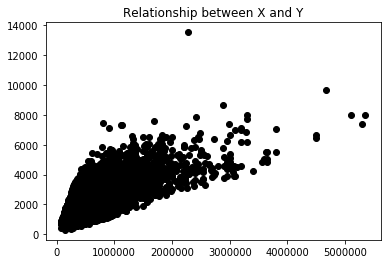

In [7]:
plt.title('Relationship between X and Y')
plt.scatter(x_train, y_train,  color='black')
plt.show()

In [28]:
#Model Building with sklearn
# Create linear regression object
lm = linear_model.LinearRegression()
# ... then fir it
# Train the model
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm.coef_

array([[0.00178387]])

In [30]:
lm.intercept_

array([1114.69578784])

In [9]:
# Have a look at R sq to give an idea of the fit 
print('R sq: ',lm.score(x_train,y_train))

R sq:  0.48842624947393903


In [12]:
# and so the correlation is..
print('Correlation: ', math.sqrt(lm.score(x_train,y_train)))

Correlation:  0.6988749884449572


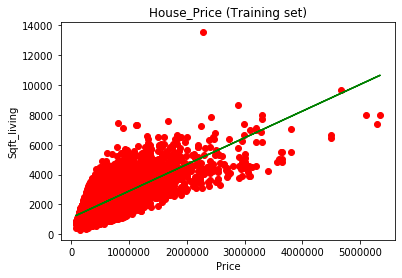

In [34]:
 #Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lm.predict(x_train), color = 'green')
plt.title('House_Price (Training set)')
plt.xlabel('Price')
plt.ylabel('Sqft_living')
plt.show()

In [36]:
#Test the model
ypred=lm.predict(x_test)
ypred.size

7205

In [33]:
x_test.head()

price
17384   297000
722    1578000
2680    562100
18754   631500
14554   780000

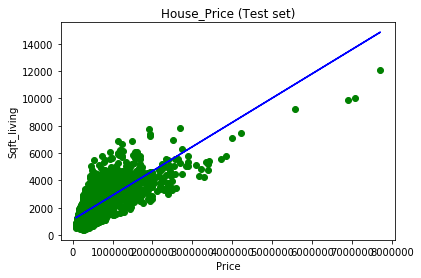

In [35]:
# Visualise Test set result
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lm.predict(x_test), color = 'blue')
plt.title('House_Price (Test set)')
plt.xlabel('Price')
plt.ylabel('Sqft_living')
plt.show()

In [38]:
#estimate the cost
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5014186290572902
The RMSE value is........ 645.8415059351391


In [70]:
#Creating our First Regression
#Acoourding to Linear equation add constant to x i.e dependent variable
x = sm.add_constant(df_x) #Untrained data
x


const   price
0        1.0  221900
1        1.0  538000
2        1.0  180000
3        1.0  604000
4        1.0  510000
...      ...     ...
21608    1.0  360000
21609    1.0  400000
21610    1.0  402101
21611    1.0  400000
21612    1.0  325000

[21613 rows x 2 columns]

In [71]:
#ordinary least squares regression(OLS)
results = sm.OLS(df_y,x).fit() # Untrain data
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:46:25   Log-Likelihood:            -1.7079e+05
No. Observations:               21613   AIC:                         3.416e+05
Df Residuals:                   21611   BIC:                         3.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1131.3544      7.914    142.952      0.000    1115.842    1146.867
price          0.0018   1.21e-05    144.920      0.000       0.002       0.002
==============================================================================
Omnibus:                     2822.488   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8775.507
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       5.807   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
x_train.shape

(14408, 1)

In [63]:
df_y.shape

(21613, 1)

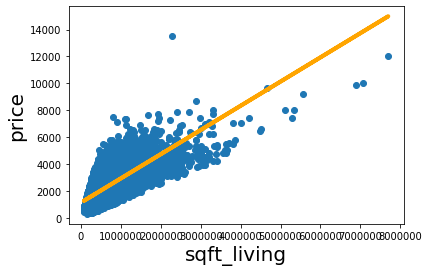

In [77]:
#Plotting the Regression line
plt.scatter(df_x,df_y)
 
yhat = (0.0018*df_x) + 1131.3544
plt.plot(df_x,yhat, lw=4, c="orange", label = "regression line")
 
plt.xlabel("sqft_living", fontsize = 20)
 
plt.ylabel("price", fontsize = 20)
 
plt.show()
 
